# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

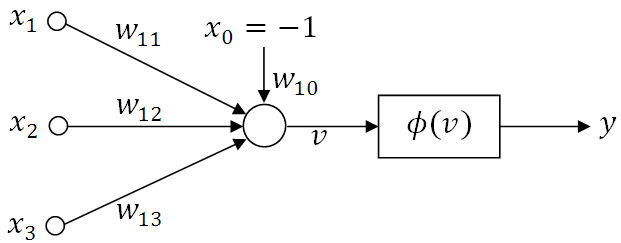

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [50]:
import numpy as np

def step_function(x):
    if x < 0:
        return 0
    else:
        return 1 

def ramp_function(x):
    if x < -0.5:
        return 0
    elif x > 0.5:
        return 1
    else:
        return x

def sigmoid_function(x, a=1):
    return 1 / (1 + np.exp(-a * x))

def neuron(x, w, activation):
    if len(w) - len(x) == 1:
        x = np.insert(x, 0, -1)
    f = np.dot(x, w)
    return activation(f)

**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [51]:
activation_functions = [step_function, ramp_function, sigmoid_function]

x1 = np.array([0.5, 1, 0.7])
x2 = np.array([0, 0.8, 0.2])

w = np.array([1, 0.2, 0.65, -0.7])

def apply_activation_functions(x, w):
   for activation in activation_functions:
      print(f"activation function: {activation.__name__}")
      output = neuron(x, w, activation)
      print(f"output: {output}\n")
print("for input x1:")
apply_activation_functions(x1, w)
print("for input x2:")
apply_activation_functions(x2, w)


for input x1:
activation function: step_function
output: 0

activation function: ramp_function
output: 0

activation function: sigmoid_function
output: 0.323004143761477

for input x2:
activation function: step_function
output: 0

activation function: ramp_function
output: 0

activation function: sigmoid_function
output: 0.34978145142617295



## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

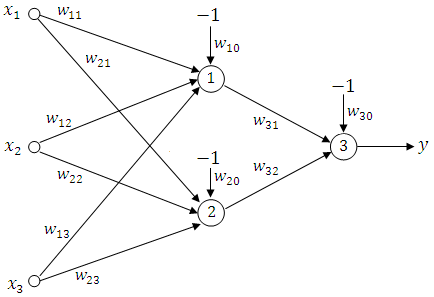

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [52]:
x = np.array([0.3, 0.7, 0.9])

def three_neuron_network(x):
    w1 = np.array([1, 0.5, 1, -0.4])  
    w2 = np.array([0.5, 0.6, -1.5, -0.7])
    w3 = np.array([-0.5, -1.5, 0.6])  

    out1 = neuron(x, w1, sigmoid_function)
    out2 = neuron(x, w2, sigmoid_function)
    new_x = np.array([out1, out2])
    out3 = neuron(new_x, w3, sigmoid_function)

    return out3

print("three neuron network output:")
print(three_neuron_network(x))

three neuron network output:
0.5021828523608841


**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

1. The output is above and it is 0.5021828523608814
2. The output of the network depends on neuron weights, for example with all weights set to 1 output is 0.6039375757235991

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

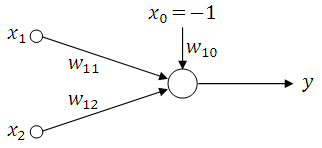

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


Initial weights: [0.14403182 0.10659929 0.21546991]
Training for lr=0.005 did not converge after 1000 epochs. Final total error: 0.1925279810920462
Training for lr=0.05 did not converge after 1000 epochs. Final total error: 0.01595338396934172
Training for lr=0.1 did not converge after 1000 epochs. Final total error: 0.004690223661097129
Training for lr=0.5 converged at epoch 437 with total error 0.0009967485456613078
Training for lr=1 converged at epoch 211 with total error 0.000997999039695663
Training for lr=5 converged at epoch 12 with total error 0.0009946691354516491


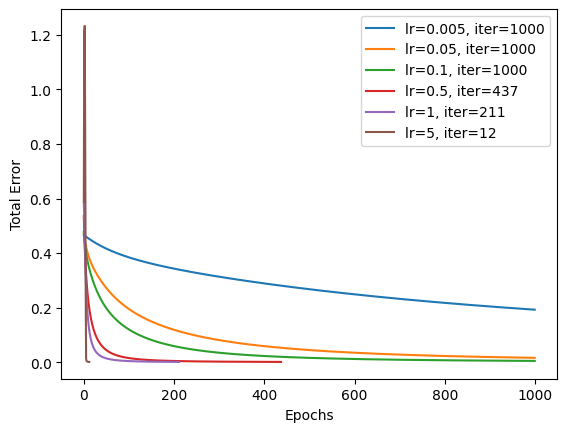

In [53]:
import matplotlib.pyplot as plt

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]
y = [0, 0, 0, 1] 
w = np.random.rand(3)
print(f"Initial weights: {w}")
learning_rates = [0.005, 0.05, 0.1, 0.5, 1, 5]
epochs = 1000

def train_perceptron(x_data, y_data, w, learning_rate, epochs, epsilon = 0.001):
   errors = []
   for epoch in range(epochs):
      total_error = 0
      for i in range(len(x_data)):
         y_pred = neuron(x_data[i], w, sigmoid_function)
         e = y_data[i] - y_pred
         w += (learning_rate * e) * x_data[i] #delta
         total_error += e ** 2
      total_error = total_error / 2
      errors.append(total_error)
      if total_error < epsilon:
         print(f"Training for lr={learning_rate} converged at epoch {epoch} with total error {total_error}")
         return errors, epoch
   print(f"Training for lr={learning_rate} did not converge after {epochs} epochs. Final total error: {total_error}")
   return errors, epochs

all_errors = []
for lr in learning_rates:
   error, iteration = train_perceptron(np.array([x1, x2, x3, x4]), y, w.copy(), lr, epochs)
   all_errors.append((lr, error, iteration))
   plt.plot(error, label=f'lr={lr}, iter={iteration}')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.legend()
plt.show()

1. Best learning rate is 5, because it converges the fastest and the error is the smallest. Learning rate affects how fast the network learns.
2. The sufficiently small error is defined as 0.001 because it is small enough to be close to the expected output.
3. The algorithm terminates after 1000 iterations if it does not converge earlier due to reaching the epsilon threshold.

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [54]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")
print(b2)

[[107]
 [114]
 [ 97]
 [106]]


### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [55]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [56]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [57]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [58]:
lista_b=[b1, b2, b3, b4]
lista_a=[a1, a2, a3, a4]
for i in range(len(lista_a)):
   print(f"key: {lista_a[i]} value: {char(M@lista_a[i])}")


key: [[1]
 [0]
 [0]
 [0]] value: vrat
key: [[0]
 [1]
 [0]
 [0]] value: kraj
key: [[0]
 [0]
 [1]
 [0]] value: cres
key: [[0]
 [0]
 [0]
 [1]] value: otac


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


1. all input-output pairs were memorized correctly.
2. If vectors were not normalized, the number of memorized input-output pairs would be the same, because they are orthogonal, and the maximum number of orthogonal vectors in 4D space is 4.

### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [59]:
a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [60]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [61]:
lista_a.append(a5)
lista_b.append(b5)
for i in range(len(lista_a)):
   print(f"key: {lista_a[i]} value: {char(M_five@lista_a[i])}")

key: [[1]
 [0]
 [0]
 [0]] value: ÃÂ¥¿
key: [[0]
 [1]
 [0]
 [0]] value: kraj
key: [[0]
 [0]
 [1]
 [0]] value: °Â©¾
key: [[0]
 [0]
 [0]
 [1]] value: otac
key: [[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]] value: ĆēíĎ


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


1. The new association was not properly memorized.
2. Other associations did not stay correctly memorized. The first and third one were not memorized correctly because we used them to form the new key, which makes them no longer orthogonal. The second and fourth were correct because they are still orthogonal with other vectors.

### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [62]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [106]:
lista_a2 = [a1, a2, a3, a4]
lista_b2 = [b1, b2, b3, b4]
print(all(M@a1 == b1)) # this is false for all cases
print(all(M@a2 == b2))
print(all(M@a3 == b3))
print(all(M@a4 == b4))
# for i in range(len(lista_a2)):
#    print(f"key: {lista_a2[i]} value: {char(M@lista_a2[i])}")


False
False
False
False


1. For each input key the responses raised an error chr() arg not in range because the output vectors were not properly memorized.
2. None of the associations were memorized correctly.
3. All associations were not memorized correctly because the input vectors were not orthogonal.
4. We can fix this problem by using orthogonal input vectors.

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [64]:
A=np.hstack([a1, a2, a3, a4])
print(A)

[[114 107 109 109]
 [117 115 111  97]
 [107 101 114 109]
 [ 97 116 101  97]]


After this step we perform the orthonormalization step:

In [65]:
from scipy.linalg import orth
C=orth(A.T)
print(C)

[[-0.50594743  0.14847022  0.77925491  0.33872641]
 [-0.50939047 -0.83525837 -0.19795538  0.06065043]
 [-0.50546797  0.25257838 -0.01775974 -0.8248581 ]
 [-0.47858195  0.46530012 -0.59435684  0.44854773]]


We extract individual orthonormal vectors $c_i$:

In [66]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [67]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [68]:
lista_c = [c1, c2, c3, c4]
for i in range(len(lista_c)):
   print(f"key: {lista_c[i]} value: {char(M@lista_c[i])}")

key: [[-0.50594743]
 [ 0.14847022]
 [ 0.77925491]
 [ 0.33872641]] value: vrat
key: [[-0.50939047]
 [-0.83525837]
 [-0.19795538]
 [ 0.06065043]] value: kraj
key: [[-0.50546797]
 [ 0.25257838]
 [-0.01775974]
 [-0.8248581 ]] value: cres
key: [[-0.47858195]
 [ 0.46530012]
 [-0.59435684]
 [ 0.44854773]] value: otac


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


1. The effect of vector orthonormalization is that all input-output pairs were memorized correctly because the vectors are linearly independent.
2. All 4 pairs were correctly memorized.
3. When normalizing the vectors, we don't guarantee that they will be orthogonal, so some pairs may not be memorized correctly. By normalizing we only ensure that the vectors have a length of 1.
4. When only orthogonalizing the vectors, we ensure that they are linearly independent, so all pairs will be memorized correctly, but the vectors may not have a length of 1.
5. If vectors are linearly independent but not orthogonal, we can still expect that all pairs will be memorized correctly, but the output may be scaled versions of the expected output.

### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [69]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [72]:
print(all(np.round(M@a1) == b1))
print(all(np.round(M@a2) == b2))
print(all(np.round(M@a3) == b3))
print(all(np.round(M@a4) == b4))
for i in range(len(lista_a2)):
   print(f"key: {lista_a2[i]} value: {char(np.round(M@lista_a2[i]))}")

True
True
True
True
key: [[114]
 [117]
 [107]
 [ 97]] value: vrat
key: [[107]
 [115]
 [101]
 [116]] value: kraj
key: [[109]
 [111]
 [114]
 [101]] value: cres
key: [[109]
 [ 97]
 [109]
 [ 97]] value: otac


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


1. All associations were properly memorized. 

### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [73]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [75]:
lista_a216 = [a1, a2, a3, a4, a5]
print(all(np.round(M@a1) == b1))
print(all(np.round(M@a2) == b2))
print(all(np.round(M@a3) == b3))
print(all(np.round(M@a4) == b4))
print(all(np.round(M@a5) == b5))
for i in range(len(lista_a216)):
   print(f"key: {lista_a216[i]} value: {char(M@lista_a216[i])}")

False
True
False
True
False
key: [[1]
 [0]
 [0]
 [0]] value: faQ`
key: [[0]
 [1]
 [0]
 [0]] value: kraj
key: [[0]
 [0]
 [1]
 [0]] value: SaU_
key: [[0]
 [0]
 [0]
 [1]] value: otac
key: [[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]] value: v


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3483991913.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


1. The first, third and fifth pairs were not memorized correctly.
2. The errors are because the fifth input vector is not orthogonal to the others, which causes interference in the output.

## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [76]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [77]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [78]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [79]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [80]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [81]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

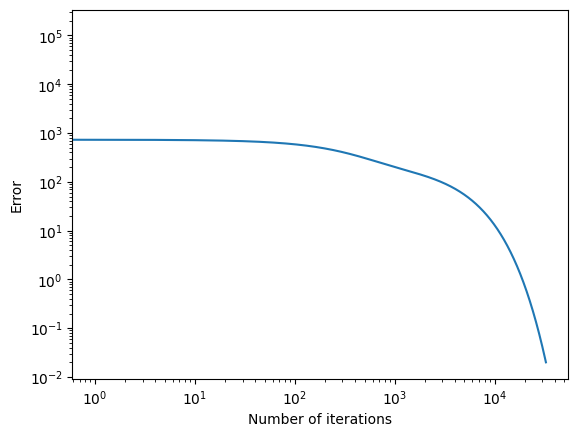

In [82]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

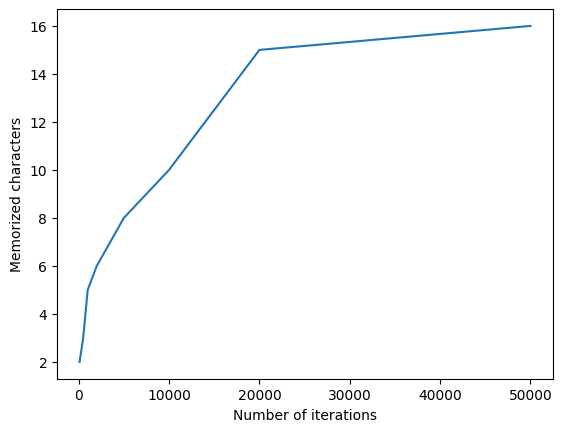

In [99]:
M=np.random.rand(4, 4)-0.5
iterations = [100, 500, 1000, 2000, 5000, 10000,20000, 50000]

memorized_characters = []
for i in iterations:
   M2, e=trainlms(A, B, M.copy(), ni, i)
   memorized_characters.append(np.sum(np.round(M2@A)==B))
plt.plot(iterations, memorized_characters)
plt.xlabel("Number of iterations")
plt.ylabel("Memorized characters")
plt.show()

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [100]:
a5 = real("auto")
b5 = real("mrak")
A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
M=np.random.rand(4, 4)-0.5

Use the *trainlms* function in the following way:

In [105]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))
print(e[-1])

2
219.79844711685445


**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)

1. I used 100 000 iterations.
2. 2 characters were memorized correctly.
3. The SSE error is 219.79844711685445
4. If we call the function from the beginning, the results wouldn't change.
5. 2 characters are correctly memorized now and the mistake is 219.79844711685445. There is no difference because the network cannot memorize all five associations.
6. No, it is not possible.
7. It is not possible to train this network to memorize all five associations because the maximum number a 4x4 matric can memorize is 4 orthogonal vectors. The fifth vector will always interfere with others so it cannot be memorized correctly.